<a href="https://colab.research.google.com/github/PandaX187/OcuTriage/blob/main/Preprocessing_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Dataset"
print(os.listdir(dataset_path))

['Yellow_Mild_Moderate', 'Red_Severe_Proliferative', 'Green_No_DR', 'train.csv', 'train_images.zip']


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Dataset"

print("Dataset path exists:", os.path.exists(dataset_path))
print("Folders inside dataset:", os.listdir(dataset_path))

Dataset path exists: True
Folders inside dataset: ['Yellow_Mild_Moderate', 'Red_Severe_Proliferative', 'Green_No_DR', 'train.csv', 'train_images.zip']


In [ ]:
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(folder, ":", num_images, "images")


Yellow_Mild_Moderate : 1369 images
Red_Severe_Proliferative : 488 images
Green_No_DR : 1805 images


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 3662 files belonging to 3 classes.
Using 2930 files for training.
Found 3662 files belonging to 3 classes.
Using 732 files for validation.


In [ ]:
class_names = train_ds.class_names
print("Class Names:", class_names)


Class Names: ['Green_No_DR', 'Red_Severe_Proliferative', 'Yellow_Mild_Moderate']


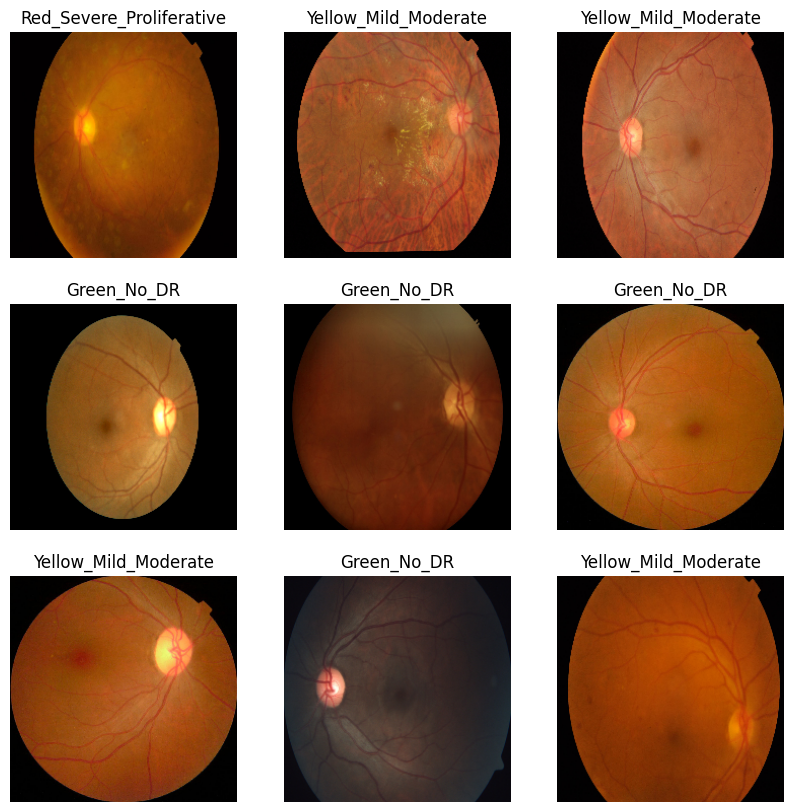

In [ ]:
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


In [ ]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Preprocessing pipeline ready!")


Preprocessing pipeline ready!


In [ ]:
print("----- PREPROCESSING SUMMARY -----")
print("Dataset location:", dataset_path)
print("Image size:", IMG_SIZE)
print("Batch size:", BATCH_SIZE)
print("Train/Validation split: 80% / 20%")
print("Normalization: Rescaling 1./255")
print("Augmentation: Flip + Rotation + Zoom")
print("Classes:", class_names)
print("---------------------------------")


----- PREPROCESSING SUMMARY -----
Dataset location: /content/drive/MyDrive/Dataset
Image size: (224, 224)
Batch size: 32
Train/Validation split: 80% / 20%
Normalization: Rescaling 1./255
Augmentation: Flip + Rotation + Zoom
Classes: ['Green_No_DR', 'Red_Severe_Proliferative', 'Yellow_Mild_Moderate']
---------------------------------
